## Assignment 7B

### Problem 1 (100 points)
The relaxation method is not limited to solving differential equations with multiple independent variables. It can also be used for ordinary differential equations with a single independent variable. In this context, as with partial differential equations, it is a technique for solving boundary value problems, which are less common with ordinary differential equations but do occur.

Consider the example problem we looked at in one of the lectures, in which a ball is thrown from height $x = 0$ into the air and lands back at $x = 0$ ten seconds later. Ignoring friction effects, the trajectory is the solution of the ordinary differential equation:
$$\dfrac{d^2x}{dt^2}=-g$$
where $g$ is the acceleration due to gravity. The goal is to determine the ball’s trajectory, but we cannot directly apply an initial value method such as RK4 since the initial velocity is unknown. A possible approach is the shooting method (which we previously implemented in Assignment 4B to solve a similar boundary value problem, using RK4 in combination with root-finding techniques).

In this assignment we will solve the same problem using the relaxation method.

#### Problem 1.A
Replacing the second derivative in this equation with its finite-difference approximation (as given below), as follows:
$$\dfrac{d^2x}{dt^2}\approx\dfrac{x(t+h)-2x(t)+x(t-h)}{h^2}$$
derive a relaxation-method equation for solving this problem on a time-like grid of points with separation $h$.

We can rewrite it as the following:
$$\begin{align}
-g&=\dfrac{x(t+h)-2x(t)+x(t-h)}{h^2}\\
0&=x(t+h)-2x(t)+x(t-h)+gh^2\\
2x(t)&=x(t+h)+x(t-h)+gh^2\\
x(t)&=\dfrac{x(t+h)+x(t-h)}{2}+\dfrac{gh^2}{2}\\
\end{align}$$

In [6]:
import numpy as np


# Problem Parameters
G = 9.81 # m/s^2, Gravitational Acceleration
Δt = 0.1 # Seconds
x0 = 0   
t0 = 0   # Seconds
tf = 10  # Seconds
ω  = 0.0 # Relaxation Parameter
N  = int((tf-t0)/Δt)+1  # Number of Grid Points

# Function to iterate the height array
def iterate(height: np.ndarray, gravity: np.ndarray, tolerance: float, max_iterations: int|None=None) -> None:
    for _ in range(max_iterations):
        old_height = height.copy()
        height[1:-1] = (1+ω)*0.5*(height[:-2] + height[2:] + G * Δt**2 * gravity[1:-1]) + ω*height[1:-1]
        if np.all(np.abs(height - old_height) < tolerance):
            print(f"Converged in {_+1} iterations")
            break
    else:
        print("Max Iterations Reached")


#### Problem 1.B
Using the boundary conditions $x = 0$ at both $t = 0$ and $t = 10$, write a program to solve for the height of the ball as a function of time using the relaxation method with 100 points and make a plot of the result from $t = 0$ to $t = 10$. Run the relaxation method until the answers change by $10^{−6}$ or less at every point on each step.

**Note:** Unlike the shooting method, the relaxation method does not give us the initial value of the velocity needed to achieve the required solution. It gives us only the solution itself, although one could get an approximation to the initial velocity by calculating a numerical derivative of the solution at time $t = 0$. Overall, the relaxation method for ordinary differential equations is most useful when the goal is to determine the solution itself rather than the initial conditions required to reach it.

Converged in 17669 iterations


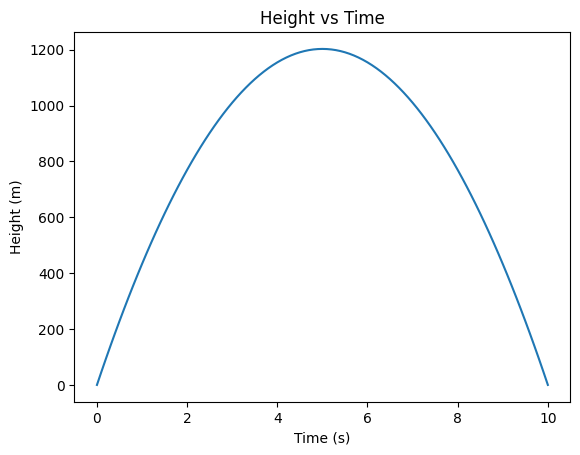

In [7]:
import numpy as np

# Problem Parameters
G = 9.81 # m/s^2, Gravitational Acceleration
Δt = 0.1 # Seconds
x0 = 0   
t0 = 0   # Seconds
tf = 10  # Seconds
ω  = 0.0 # Relaxation Parameter
N  = int((tf-t0)/Δt)+1  # Number of Grid Points

# Create the acceleration array
height = np.zeros(N)
gravity = np.array([G] * N)

# Iterate the height array steps
iterate(height, gravity, 1e-4, 100_000)

# Plot the height array
import matplotlib.pyplot as plt
plt.plot(np.linspace(t0, tf, N), height)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.title("Height vs Time")
plt.show()